In [127]:
players = "L. Messi"

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar
from mplsoccer import PyPizza, add_image, FontManager
from highlight_text import fig_text

In [129]:
# Doenload specifc fonts from github
font_normal = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto%5Bwdth,wght%5D.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto-Italic%5Bwdth,wght%5D.ttf')
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
                        'RobotoSlab%5Bwght%5D.ttf')

In [130]:
# Read both excel files
similarity_df = pd.read_csv('similarity_df.csv')
metrics_df = pd.read_csv('metrics_df.csv')

In [131]:
# filter data for player selected in dropdown
def player_select(players):
    if players == 'All':
        player_df = similarity_df
    else:
        player_df = similarity_df[['Player',players]].sort_values(players, ascending=False)
    return player_df

In [132]:
player_df = player_select(players)

# Player Similarity
See Wyscout for the exact names to search for.

In [133]:
table = player_df.reset_index(drop=True).iloc[1:,:].head(10)

In [134]:
table.style \
     .background_gradient(cmap='Blues')

,Player,L. Messi
1,Sergio Canales,90.200000
2,F. Wirtz,90.120000
3,Luis Alberto,88.080000
4,M. Ødegaard,87.680000
5,Neymar,87.510000
6,K. De Bruyne,87.400000
7,Á. Di María,87.080000
8,M. Reus,86.310000
9,J. Iličić,84.740000
10,L. Majer,84.700000


In [135]:
# selecting only numerical metrics
metrics = metrics_df.drop(['Birth country','Passport country','Foot','Height','Weight','On loan'], axis=1)
metrics = metrics.iloc[:, 11:-1]

metric_cols = list(metrics.columns)
metric_cols = list(metrics.columns)

# Z-Scores
#for col in metric_cols:
    #metrics[col] = (metrics[col] - metrics[col].mean())/metrics[col].std(ddof=0)

# Normalising 0-100
for col in metric_cols:
    metrics[col] = (metrics[col] - min(metrics[col])) / (max(metrics[col]) - min(metrics[col])) * 100

# Merge player name and minutes onto their metrics
metrics = metrics.reset_index()
metrics = metrics.merge(metrics_df[['index','Player','Minutes played','Position1']], how='left', on='index')

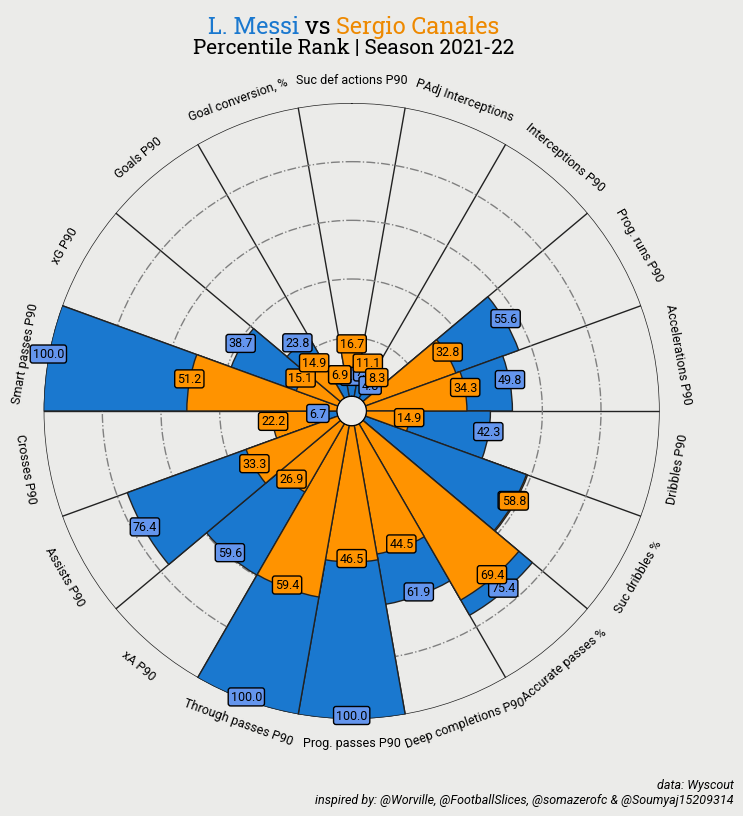

In [136]:
# Select two players to compare
player1 = metrics.loc[metrics['Player']==player_df.Player.iloc[0]].reset_index()
player2 = metrics.loc[metrics['Player']==player_df.Player.iloc[1]].reset_index()

# parameter list
params = [
    "Suc def actions P90", "PAdj Interceptions", "Interceptions P90",
    "Prog. runs P90", "Accelerations P90", "Dribbles P90", "Suc dribbles %",
    "Accurate passes %", "Deep completions P90", "Prog. passes P90", "Through passes P90",
    "xA P90", "Assists P90", "Crosses P90", "Smart passes P90",
    "xG P90", "Goals P90", "Goal conversion, %"
]

# value list
values = [
    round(player1['Successful defensive actions per 90'].loc[0],1),round(player1['PAdj Interceptions'].loc[0],1),round(player1['Interceptions per 90'].loc[0],1),
    round(player1['Progressive runs per 90'].loc[0],1), round(player1['Accelerations per 90'].loc[0],1), round(player1['Dribbles per 90'].loc[0],1), round(player1['Successful dribbles, %'].loc[0],1),
    round(player1['Accurate passes, %'].loc[0],1), round(player1['Progressive passes per 90'].loc[0],1), round(player1['Deep completions per 90'].loc[0],1), round(player1['Through passes per 90'].loc[0],1),
    round(player1['xA per 90'].loc[0],1), round(player1['Assists per 90'].loc[0],1), round(player1['Crosses per 90'].loc[0],1), round(player1['Smart passes per 90'].loc[0],1),
    round(player1['xG per 90'].loc[0],1), round(player1['Goals per 90'].loc[0],1),round(player1['Goal conversion, %'].loc[0],1)
]
values_2 = [
    round(player2['Successful defensive actions per 90'].loc[0],1),round(player2['PAdj Interceptions'].loc[0],1),round(player2['Interceptions per 90'].loc[0],1),
    round(player2['Progressive runs per 90'].loc[0],1), round(player2['Accelerations per 90'].loc[0],1), round(player2['Dribbles per 90'].loc[0],1), round(player2['Successful dribbles, %'].loc[0],1),
    round(player2['Accurate passes, %'].loc[0],1), round(player2['Progressive passes per 90'].loc[0],1), round(player2['Deep completions per 90'].loc[0],1), round(player2['Through passes per 90'].loc[0],1),
    round(player2['xA per 90'].loc[0],1), round(player2['Assists per 90'].loc[0],1), round(player2['Crosses per 90'].loc[0],1), round(player2['Smart passes per 90'].loc[0],1),
    round(player2['xG per 90'].loc[0],1), round(player2['Goals per 90'].loc[0],1), round(player1['Goal conversion, %'].loc[0],1)
]

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#222222",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    last_circle_color="#222222",    # color of last circle
    other_circle_ls="-.",           # linestyle for other circles
    other_circle_lw=1               # linewidth for other circles
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                     # list of values
    compare_values=values_2,    # comparison values
    figsize=(8, 8),             # adjust figsize according to your need
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#222222",
        zorder=2, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_compare=dict(
        facecolor="#FF9300", edgecolor="#222222",
        zorder=2, linewidth=1,
    ),
    kwargs_params=dict(
        color="#000000", fontsize=9,
        fontproperties=font_normal.prop, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=9,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    ),                          # values to be used when adding parameter-values labels
    kwargs_compare_values=dict(
        color="#000000", fontsize=9, fontproperties=font_normal.prop, zorder=3,
        bbox=dict(edgecolor="#000000", facecolor="#FF9300", boxstyle="round,pad=0.2", lw=1)
    ),                          # values to be used when adding parameter-values labels
)

# add title
fig_text(
    0.515, 0.99, f"<{player_df.Player.iloc[0]}> vs <{player_df.Player.iloc[1]}>", size=17, fig=fig,
    highlight_textprops=[{"color": '#1A78CF'}, {"color": '#EE8900'}],
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Percentile Rank | Season 2021-22",
    size=15,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add credits
CREDIT_1 = "data: Wyscout"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_italic.prop, color="#000000",
    ha="right"
)

plt.show()